<a href="https://colab.research.google.com/github/tunglinwood/Learning-Material/blob/main/Using_SVM_SCV_and_sktime_to_predict_and_forecast_the_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install pandas_datareader

In [3]:
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Setup Complete")

Setup Complete


In [4]:
data = yf.download('AAPL', start = '2022-01-01', end='2024-03-14')
data = pd.DataFrame(data['Close'])

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
...,...
2024-03-07,169.000000
2024-03-08,170.729996
2024-03-11,172.750000


In [6]:
data['Returns'] = np.log(data / data.shift())

In [7]:
data

,Close,Returns
Date,,
2022-01-03,182.009995,NaN
2022-01-04,179.699997,-0.012773
2022-01-05,174.919998,-0.026960
2022-01-06,172.000000,-0.016834
2022-01-07,172.169998,0.000988
...,...,...
2024-03-07,169.000000,-0.000710
2024-03-08,170.729996,0.010185
2024-03-11,172.750000,0.011762


In [8]:
#To see if there is any null value
data.isnull().sum()

Close      0
Returns    1
dtype: int64

In [9]:
#In case there is null value, we use dropna and change to the original data directly using inplace=True
data.dropna(inplace=True)

In [10]:
#set a separate value to shift the data by 6 steps, we can change this value anytime if needed. lagged time as feature is a common method used in the time-series data analysis
lags=6

In [11]:
cols=[]
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [12]:
data

,Close,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2022-01-12,175.529999,0.002567,1.0,1.0,1.0,-1.0,-1.0,-1.0
2022-01-13,172.190002,-0.019211,1.0,1.0,1.0,1.0,-1.0,-1.0
2022-01-14,173.070007,0.005098,-1.0,1.0,1.0,1.0,1.0,-1.0
2022-01-18,169.800003,-0.019075,1.0,-1.0,1.0,1.0,1.0,1.0
2022-01-19,166.229996,-0.021249,-1.0,1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2024-03-07,169.000000,-0.000710,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2024-03-08,170.729996,0.010185,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2024-03-11,172.750000,0.011762,1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']


<Axes: xlabel='Date'>

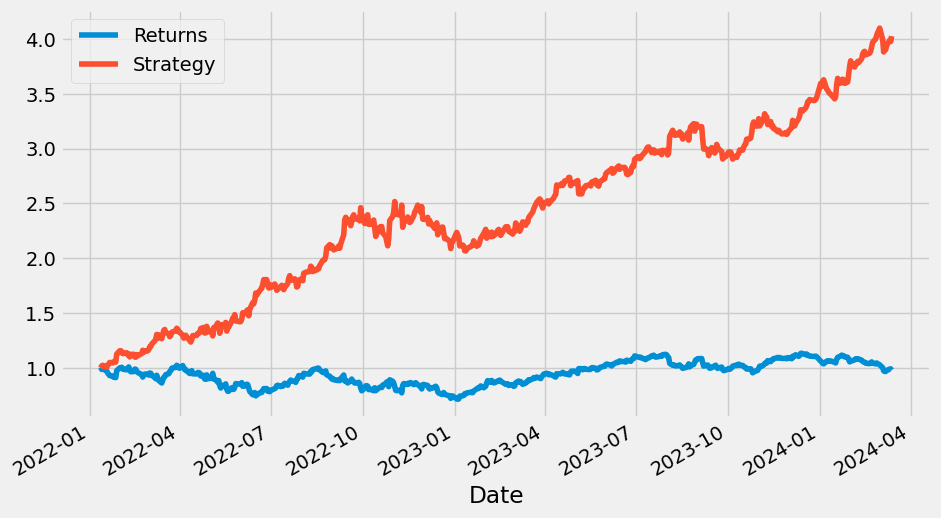

In [14]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

<Axes: xlabel='Date'>

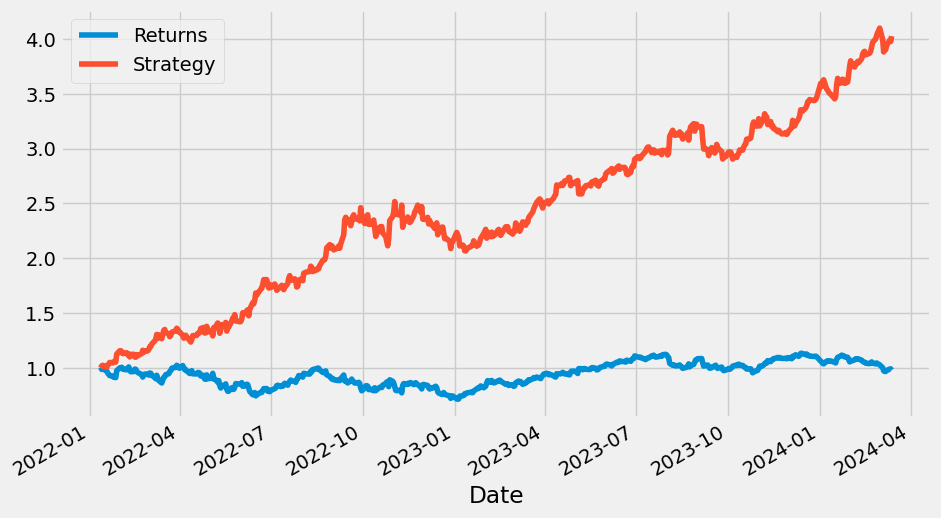

In [15]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

1. Create another Forecast data with log return

In [16]:
!pip install sktime

In [16]:
from sktime.forecasting.naive import NaiveForecaster
import pandas as pd

